# Logistic Regression

🎯 Up until now, you have been modeling a regression task. This time, you are going to be modeling a classification task, on the famous Titanic dataset.

👇 Load the `titanic.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


```markdown
Variable    Definition      Key

survival    Survival        0 = No, 1 = Yes
pclass      Ticket class    1 = 1st, 2 = 2nd, 3 = 3rd
sex         Sex
Age         Age in years
sibsp       # of siblings / spouses aboard the Titanic
parch       # of parents / children aboard the Titanic
ticket      Ticket number
fare        Passenger fare
cabin       Cabin number
embarked    Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
```

# 1. Model evaluation

👇 We want to predict whether a passenger survived (`Survived`) the Titanic disaster, according to the following features:

- The class in which she/he was travelling (`Pclass`)
- The number of siblings/spouses he had onboard (`SibSp`)
- The number of parents/children he had onboard (`Parch`)
- The fare he paid for the ticket (`Fare`)

❓How accurate would a `LogisticRegression` model be at such a task? Save the accuracy under variable name `accuracy`.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

X = df[['Pclass', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

model = LogisticRegression()
cv_result = cross_validate(model, X, y, cv=5)

accuracy = cv_result['test_score'].mean()
accuracy

0.6835791852363318

### ☑️ Check your code

In [4]:
from nbresult import ChallengeResult

result = ChallengeResult('accuracy',
                         accuracy = accuracy
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_accuracy.py::TestAccuracy::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/accuracy.pickle

git commit -m 'Completed accuracy step'

git push origin master



# 2. In-depth diagnosis

❓We've evaluated the accuracy of the model at predicting, but we want to investigate its performance in more depth. Is the model overfitting? Underfitting? How many learning examples does it need to learn optimally on the given features?

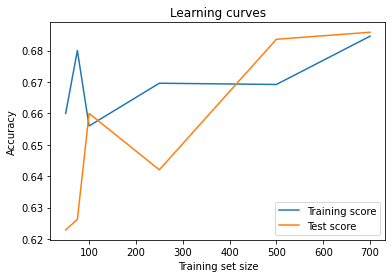

In [8]:
from sklearn.model_selection import learning_curve

model = LogisticRegression()

train_sizes = [25, 50, 75, 100, 250, 500, 700]
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X, y=y, train_sizes=train_sizes, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend();


<details>
<summary> ℹ️ Once you have completed your diagnosis, unfold this cell </summary>   
    
<br/>
You should have plotted the learning curves.

👉 The curves should have converged:
- The model is not overfitting (no variance): it generalizes well.

👉 The test score stops increasing around 500 training observations:
- The model does not need more than 500 training observations to perform optimally on the given features.
    
</details>


# 3. Reduced training size

👇 Evaluate a model on the training size suggested by the curves. Are you able to maintain a similar accuracy? Save the new accuracy under variable name `reduced_training_accuracy`

In [9]:
reduced_training = df.loc[1:500,:]

X = reduced_training[['Pclass', 'SibSp', 'Parch', 'Fare']]
y = reduced_training["Survived"]

model = LogisticRegression()
cv_result = cross_validate(model, X, y, cv=5)

reduced_training_accuracy = cv_result['test_score'].mean()
reduced_training_accuracy

0.65

ℹ️ The accuracy should be nearly the same, with a reduced computational expense.

### ☑️ Check your code

In [10]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_accuracy',
                         accuracy = reduced_training_accuracy
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_reduced_accuracy.py::TestReduced_accuracy::test_accuracy PASSED     [100%]

============================== 1 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/reduced_accuracy.pickle

git commit -m 'Completed reduced_accuracy step'

git push origin master



# 4. Predictions

❓ Did the following person survive the Titanic disaster?

- Travelled in class 1 (`Pclass`)
- Had no spouse or siblings on board(`SibSp`)
- Had no parents or children on board (`Parch`)
- Paid 15 for his ticket (`Fare`)

⚠️ Make sure the model you use for predicting has the **least computational expense possible**. Save the prediction under variable name `prediction`.

In [23]:
model.fit(X.values, y)

prediction = model.predict([[1, 0, 0, 15]])[0]
prediction

1

❓ What is the probability that the person survived? Compute your answer and save it under variable name `probability`.


<details>
    <summary markdown='span'>💡 Hint</summary>

To return the predicted probabilities from a fitted sklearn Classifier, have a look at the method `.predict_proba()`
</details>

In [24]:
probability = model.predict_proba([[1, 0, 0, 15]])[0][1]
probability

0.513503725586056

In [25]:
from nbresult import ChallengeResult

result = ChallengeResult('predictions',
                         prediction = prediction,
                         probability = probability
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 3 items

test_predictions.py::TestPredictions::test_prediction_is_1 PASSED        [ 33%]
test_predictions.py::TestPredictions::test_probability PASSED            [ 66%]
test_predictions.py::TestPredictions::test_probability_type PASSED       [100%]

============================== 3 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/predictions.pickle

git commit -m 'Completed predictions step'

git push origin master



# 5 Optional - Model Calibration
*Can you trust the predicted probabilities?* 🤔

- ❗️ Accuracy only evaluate your model performance based on the predicted **classes** 0s and 1s (obtained via`.predict()`)
- ❗️ High accuracy does not necessarily mean that predicted **probabilities** are "calibrated" (obtained via `.predict_probas()`)

What does "calibrated" probabilities mean? 
> _Among the samples to which your model gave a predict_proba value close to 0.9, approximately 90% actually belong to the positive class._

<img src='https://raw.githubusercontent.com/lewagon/data-images/master/math/logistic-regression.png'>

❓ **Question 1**: Read more about [Calibration](https://scikit-learn.org/stable/modules/calibration.html) on sklearn docs

When performing classification you often want not only to predict the class label, but also obtain a probability of the respective label. This probability gives you some kind of confidence on the prediction. Some models can give you poor estimates of the class probabilities and some even do not support probability prediction (e.g., some instances of SGDClassifier). The calibration module allows you to better calibrate the probabilities of a given model, or to add support for probability prediction.

Well calibrated classifiers are probabilistic classifiers for which the output of the predict_proba method can be directly interpreted as a confidence level. For instance, a well calibrated (binary) classifier should classify the samples such that among the samples to which it gave a predict_proba value close to 0.8, approximately 80% actually belong to the positive class.

❓ **Question 2**: Try to implement `CalibrationDisplay` to check if you model is calibrated (on a holdout test set)

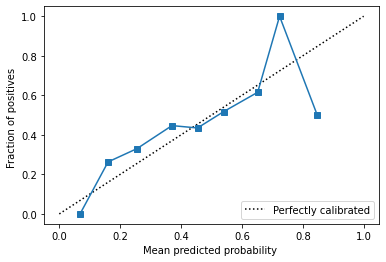

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibrationDisplay, calibration_curve

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.5)

# Fit a model on the train set
model.fit(X_train, y_train)

# Print calibration curve on the test set
y_prob = model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
disp.plot();

❓ **Question 3**: Try to calibrate your model using `CalibratedClassifierCV`, and compute your new probability of survival. 

(Note that logistic regression are already generally well calibrated because they try to minimize the log-loss, refer to lecture https://kitt.lewagon.com/camps/YOUR_CAMP_NUMBER/lectures/content/04-Decision-Science_04-Logistic-Regression.slides.html?title=Logistic-Regression#/2/7/0)

In [43]:
from sklearn.calibration import CalibratedClassifierCV
#from sklearn.naive_bayes import GaussianNB

model = LogisticRegression() # GaussianNB
calibrated_model = CalibratedClassifierCV(model, cv=5)
calibrated_model.fit(X_train, y_train)

probability = calibrated_model.predict_proba([[1, 0, 0, 15]])[0][1]
probability

0.5115729748825311

# 🏁